In [1]:
from elliot_utils import *
from scipy import stats

In [2]:
analysisPath = Path.cwd().joinpath('analysis_files/basic_questions/')
figPath = Path.cwd().joinpath('figures/basic_questions/')

In [3]:
results = getOrderedFiles(HYBRID_RESULTS, '.tsv')
dbs = getOrderedFiles(HYBRID_DB, '.fasta')
refs = [ProtRef(x) for x in dbs]
bPeps = getFilteredPeptides(results, 'bacteria')
hPeps = getFilteredPeptides(results, 'human')

How many human and bacterial PSMs were identified, on average, in BV- vs BV+ samples?

In [4]:
bPsmCounts = []
hPsmCounts = []

In [5]:
for i in range(len(results)):
    ref = refs[i]
    res = results[i]
    bPsmCounts.append(0)
    hPsmCounts.append(0)
    with res.open(mode='r') as infile:
        reader = csv.reader(infile, delimiter='\t')
        for row in reader:
            protType = determineIDType(row)
            if protType == 'first':
                continue
            if not isSignificant(row):
                break
            if row[PEPTIDE] in hPeps and protType == 'human':
                hPsmCounts[i] += 1
            elif row[PEPTIDE] in bPeps and protType == 'bacteria':
                bPsmCounts[i] += 1

In [6]:
# Generate figures for human psms, bacterial psms, and 16S copy number by BV status.
# Begin by generating stats so I can display those next to the graphs
bMinusPsms = []
bPlusPsms = []
hMinusPsms = []
hPlusPsms = []
qpcrMinus = []
qpcrPlus = []
for i in range(len(bPsmCounts)):
    if BV_STATUS[i] == '+':
        bPlusPsms.append(bPsmCounts[i])
        hPlusPsms.append(hPsmCounts[i])
        qpcrPlus.append(BACTERIAL_LOADS[i])
    else:
        bMinusPsms.append(bPsmCounts[i])
        hMinusPsms.append(hPsmCounts[i])
        qpcrMinus.append(BACTERIAL_LOADS[i])

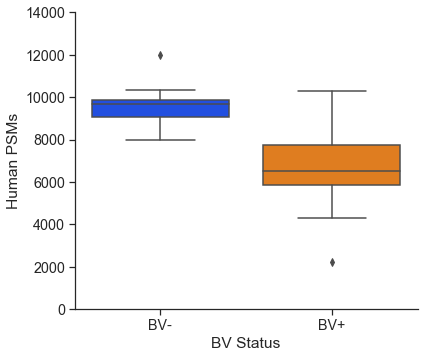

In [18]:
# Human PSMs by BV Status
bvLabels = []
for x in BV_STATUS:
    if x == '-':
        bvLabels.append('BV-')
    else:
        bvLabels.append('BV+')
humanPsmDF = pd.DataFrame({'Human PSMs':hPsmCounts, 'BV Status':bvLabels})
humanPsmPlot = sns.catplot(data=humanPsmDF, x='BV Status', y='Human PSMs', kind='box', aspect=1.2)
humanPsmPlot.set(ylim=(0, 14000))
humanPsmPlot.savefig(figPath.joinpath('psms_by_status_human.png'), bbox_inches='tight', dpi=300)

In [14]:
stats.mannwhitneyu(hPlusPsms, hMinusPsms, alternative='two-sided')

MannwhitneyuResult(statistic=14.0, pvalue=0.0003721219773321589)

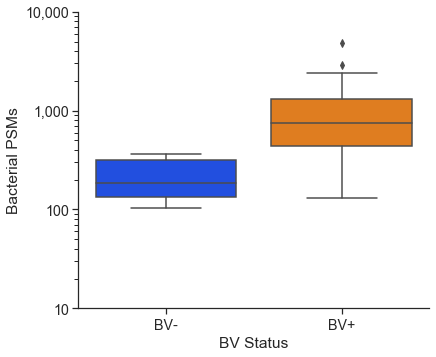

In [30]:
# Bacterial PSMs by BV Status
bvLabels = []
for x in BV_STATUS:
    if x == '-':
        bvLabels.append('BV-')
    else:
        bvLabels.append('BV+')
bacterialPsmDF = pd.DataFrame({'Bacterial PSMs':bPsmCounts, 'BV Status':bvLabels})
bacterialPsmPlot = sns.catplot(data=bacterialPsmDF, x='BV Status', y='Bacterial PSMs', kind='box', aspect=1.2)
bacterialPsmPlot.set(ylim=(10, 10000), yscale='log')
bacterialPsmPlot.set_yticklabels(labels=['1', '10', '100', '1,000', '10,000'])
bacterialPsmPlot.savefig(figPath.joinpath('psms_by_status_bacterial.png'), bbox_inches='tight', dpi=300)

In [15]:
stats.mannwhitneyu(bPlusPsms, bMinusPsms, alternative='two-sided')

MannwhitneyuResult(statistic=165.0, pvalue=0.00044480878305553533)

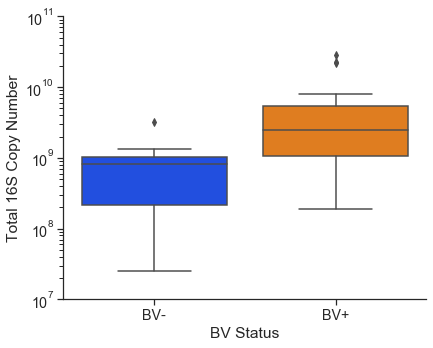

In [38]:
# Total 16S copy number by BV status
bvLabels = []
for x in BV_STATUS:
    if x == '-':
        bvLabels.append('BV-')
    else:
        bvLabels.append('BV+')
bacterialQpcrDF = pd.DataFrame({'Total 16S Copy Number':BACTERIAL_LOADS, 'BV Status':bvLabels})
bacterialQpcrPlot = sns.catplot(data=bacterialQpcrDF, x='BV Status', y='Total 16S Copy Number', kind='box', aspect=1.2)
bacterialQpcrPlot.set(ylim=(1e7, 1e11),yscale='log')
bacterialQpcrPlot.savefig(figPath.joinpath('16s_by_status.png'), bbox_inches='tight', dpi=300)

In [42]:
stats.mannwhitneyu(qpcrPlus, qpcrMinus, alternative='greater')

MannwhitneyuResult(statistic=144.0, pvalue=0.0058342501197895255)